In [5]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
#from catboost import CatBoostClassifier
from xgboost import XGBClassifier
import warnings
import pickle
warnings.filterwarnings("ignore")

data = pd.read_csv("DATA.csv")
data=data.drop(['Latitude','Longitude'],axis=1)
data = np.array(data)


X = data[:,:-1]
y = data[:,10]
y = y.astype('int')
X = X.astype('float')
# print(X,y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
log_reg = RandomForestClassifier(n_estimators=12)
#log_reg =LogisticRegression()
knn =XGBClassifier()



knn.fit(X_train, y_train)
print(knn.predict(X_test))

pickle.dump(knn,open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))

[18:02:57] WARNING: D:\bld\xgboost-split_1643227225381\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1
 1 0 0 0 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 0 1 1
 1 1 1 1 0 1 0 1 1 0 0 0 1 0 0 1 1 0 1 1 0 0 1 1 1 0 1 1 0 1 1 0 0 1 0 1 0
 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 1 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0 0 1 1 1
 1 1 1 0 1 1 1 0 1 1 1 0 1 0 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 0 0 1 0
 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1
 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0 1 1 1

In [6]:
#import forest_fire
import pickle
import numpy as np
import pandas as pd
model= pickle.load(open('model.pkl','rb'))

#final=[np.array([47,37,31,17,73,35,20,0,30.3,30.2])]
#final=[np.array([67,53,47,41,72,39,36,3,30.1,30])]
final=[np.array([59,41,45,35,93,55,10,0,30.3,30.1])]
print(final)
prediction=model.predict_proba(final)
output="{0:.2f}".format(prediction[0][1],2)

if output>str(0.5):
       print('Your Forest is in Danger.\nProbability of fire occuring is {}'.format(output))
else:
       print('Your Forest is safe.\n Probability of fire occuring is {}'.format(output))

[array([59. , 41. , 45. , 35. , 93. , 55. , 10. ,  0. , 30.3, 30.1])]
Your Forest is in Danger.
Probability of fire occuring is 0.96


In [7]:
import csv 
file = open("without_avg_parray.csv")
numpy_array = np.loadtxt(file, delimiter=",")
probability_array=[]
model= pickle.load(open('model.pkl','rb'))
for row in numpy_array:
    prediction=model.predict_proba([row])
    output="{0:.2f}".format(prediction[0][1],2)
    probability_array.append(output) 

print(len(probability_array),"\n")
print(probability_array)

1412 

['0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.07', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.01', '0.00', '0.00', '0.00', '0.00', '0.00', '0.87', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.01', '0.01', '0.02', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.01', '0.13', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.01', '0.04', '0.00', '0.00', '0.00', '0.00', '0.00', '0.47', '0.06', '0.07', '0.56', '0.00', '0.00', '0.01', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.02', '0.01', '0.00', '0.02', '0.02', '0.01', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.86', '0.75', '0.03', '0.00', '0.00', '0.01', '0.08', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.01', '0.92', '0.04', '0.04', '0.01', '0.00', '0.00', '0.08', '0.00', '0.04', '0.01', '0.00', '0.02', '0.00', '0.01', '0.00', '0.00', '0.05', '0.00', '0.00', '0.00', 

### UTTARAKHAND

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Point, Polygon

In [2]:
ukh_map = gpd.read_file("uttarakhand/india-village-census-2001-UK.shp")
stats=pd.read_csv("for_map.csv")

In [3]:
ukh_map

,SID,DID,TID,VILL_CODE,C_CODE01,NAME,UID,CENSUS_COD,STATE,DISTRICT,...,TANK_IRR,RIVER_IRR,LAKE_IRR,W_FALL,OTH_IRR,TOT_IRR,UN_IRR,CULT_WASTE,AREA_NA_CU,geometry
0,05,09,0001,01140900,0509000101140900,CHANTAR KHARI,38800,5.090000e+14,5,9,...,0.0,0.0,0.0,0.0,0.0,0.00,31.16,0.00,32.76,"POLYGON ((334155.414 3313395.750, 333990.469 3..."
1,05,09,0001,01139100,0509000101139100,KHARIK DANG,38801,5.090000e+14,5,9,...,0.0,0.0,0.0,0.0,0.0,0.00,18.33,31.91,12.12,"POLYGON ((325467.288 3307799.468, 325125.883 3..."
2,05,09,0001,01140600,0509000101140600,CHINTOLI,38802,5.090000e+14,5,9,...,0.0,0.0,0.0,0.0,0.0,0.00,112.20,111.04,20.49,"POLYGON ((328949.351 3317415.458, 329081.772 3..."
3,05,09,0002,01204400,0509000201204400,SIMAL KHET,38803,5.090000e+14,5,9,...,0.0,0.0,0.0,0.0,0.0,0.86,62.23,202.07,46.02,"POLYGON ((339046.176 3315438.513, 339078.080 3..."
4,05,09,0001,01140800,0509000101140800,LAMBARI,38804,5.090000e+14,5,9,...,0.0,0.0,0.0,0.0,0.0,0.00,42.03,0.02,22.79,"POLYGON ((332844.702 3315273.357, 332853.653 3..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16661,05,01,0002,None,None,FOREST,55461,0.000000e+00,0,0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,"POLYGON ((218905.583 3391141.221, 218835.793 3..."
16662,05,01,0003,None,None,FOREST,55462,0.000000e+00,0,0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,"POLYGON ((258664.290 3390313.987, 258601.153 3..."
16663,05,01,0003,None,None,FOREST,55463,0.000000e+00,0,0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,"POLYGON ((237897.690 3405610.097, 237263.303 3..."
16664,05,01,0003,None,None,FOREST,55464,0.000000e+00,0,0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,"POLYGON ((248039.117 3390962.092, 247508.084 3..."


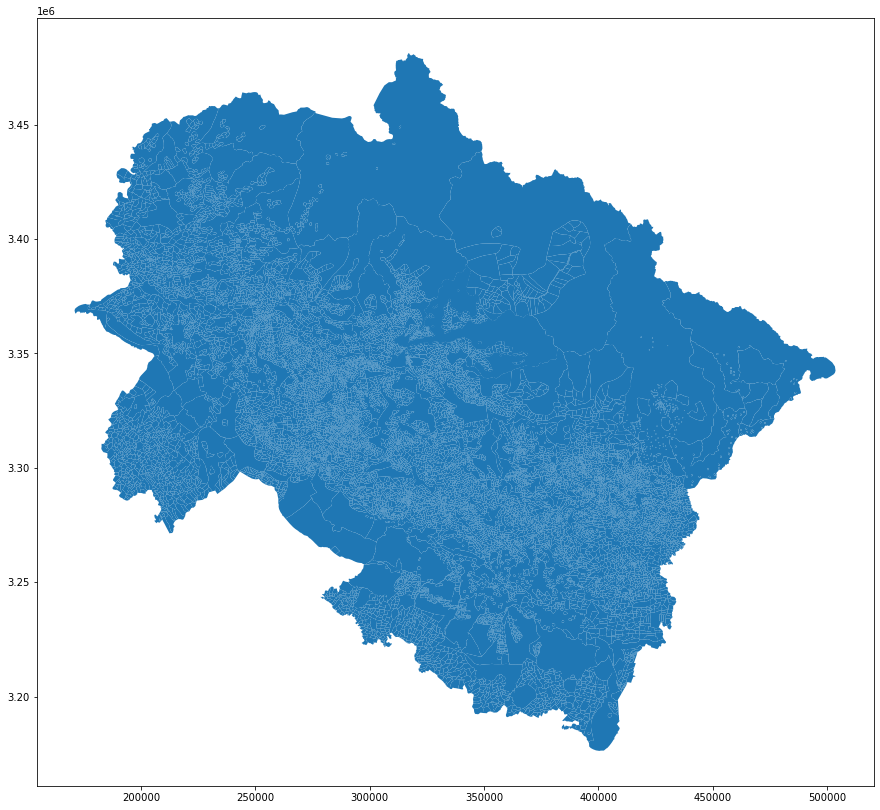

In [4]:
fig,ax=plt.subplots(figsize=(15,15))
ukh_map.plot(ax=ax)
plt.savefig('Map')

In [5]:
stats

,Latitude,Longitude,Year,Month,Day,Temperature,Temp_MAX,Temp_MIN,Dew,Wind speed,Wind speed_MAX,Wind speed_MIN,Wind direction,Relative humidity,specfic humidity,Surface Pressure,Fire
0,29.37,79.02,2019,5,31,36.37,44.98,27.59,2.22,3.12,4.74,2.14,216.19,12.88,4.70,94.26,0.00
1,29.71,78.78,2020,5,27,34.91,43.37,27.01,11.11,3.22,6.18,0.75,146.75,26.62,8.91,94.23,0.00
2,29.66,78.82,2020,5,26,34.65,43.61,26.44,10.10,3.86,6.27,1.33,198.19,25.25,8.30,94.30,0.00
3,29.40,78.92,2019,5,10,33.29,41.29,24.94,7.23,4.37,7.44,2.59,296.56,20.81,6.77,94.48,0.00
4,29.47,79.01,2019,5,11,33.15,40.47,26.78,8.62,3.06,5.23,0.66,240.62,24.31,7.51,94.74,0.00
5,29.44,79.05,2019,4,30,32.67,41.23,23.58,2.20,3.34,4.72,1.79,126.81,15.94,4.82,94.47,0.36
6,29.42,79.09,2019,5,31,31.83,39.64,22.40,1.23,3.33,5.56,1.21,188.75,15.44,4.70,88.57,0.00
7,29.57,79.03,2019,5,7,31.76,40.73,23.44,-0.53,4.90,8.44,2.42,219.50,14.25,3.91,94.49,0.00
8,29.63,78.81,2019,5,26,31.66,39.97,22.97,7.86,3.49,5.52,1.66,271.44,25.69,7.14,94.47,0.00
9,29.76,78.68,2019,5,31,30.76,38.81,21.37,0.89,3.47,5.87,1.14,206.75,16.19,4.70,86.76,0.00


In [6]:
stats=stats[['Latitude','Longitude','Fire']]

In [7]:
stats

,Latitude,Longitude,Fire
0,29.37,79.02,0.00
1,29.71,78.78,0.00
2,29.66,78.82,0.00
3,29.40,78.92,0.00
4,29.47,79.01,0.00
5,29.44,79.05,0.36
6,29.42,79.09,0.00
7,29.57,79.03,0.00
8,29.63,78.81,0.00
9,29.76,78.68,0.00


In [8]:
crs = {'init':'EPSG:4326'}
geometry = [Point(xy) for xy in zip(stats['Longitude'], stats['Latitude'])]
geo_df = gpd.GeoDataFrame(stats, 
                          crs = crs, 
                          geometry = geometry)

C:\Users\nidhi\anaconda3\envs\geo_env\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [9]:
geo_df.head()

,Latitude,Longitude,Fire,geometry
0,29.37,79.02,0.0,POINT (79.02000 29.37000)
1,29.71,78.78,0.0,POINT (78.78000 29.71000)
2,29.66,78.82,0.0,POINT (78.82000 29.66000)
3,29.40,78.92,0.0,POINT (78.92000 29.40000)
4,29.47,79.01,0.0,POINT (79.01000 29.47000)


Text(0.5, 1.0, 'uttarakhand')

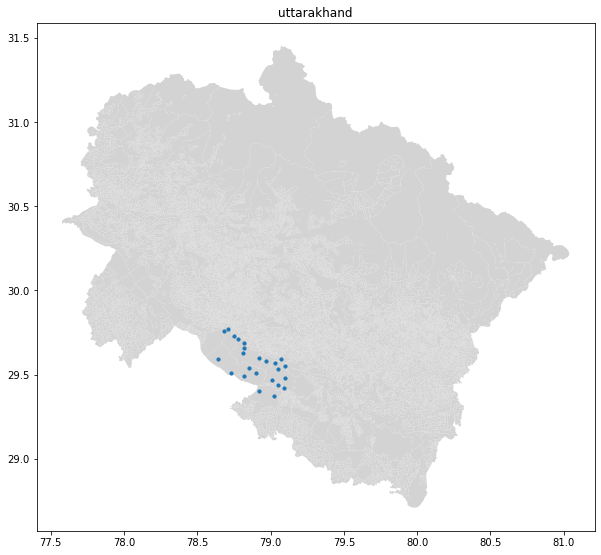

In [11]:
fig, ax = plt.subplots(figsize = (10,10))
ukh_map.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
geo_df.plot(ax=ax,markersize = 10)
ax.set_title('uttarakhand')

C:\Users\nidhi\anaconda3\envs\geo_env\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


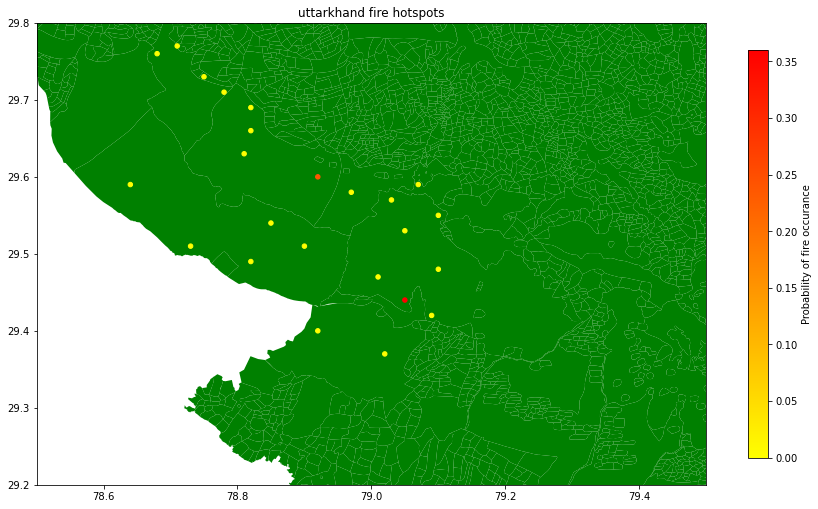

In [12]:
geo_df['temp'] = np.log(geo_df['Fire'])
fig, ax = plt.subplots(figsize = (15,15))
ukh_map.to_crs(epsg=4326).plot(ax=ax, color='green')
orig_map=plt.cm.get_cmap('autumn')
reversed_map = orig_map.reversed()
geo_df.plot(column = 'Fire', ax=ax, cmap = reversed_map,
            legend = True, legend_kwds={'shrink': 0.5, 'label':"Probability of fire occurance",}, 
            markersize =20)
ax.set_xlim([78.5, 79.5])
ax.set_ylim([29.2, 29.8])
ax.set_title('uttarkhand fire hotspots')
plt.savefig('Heat Map_uttarakhand')